In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [551]:
ctdc = pd.read_csv("/home/nizam/Desktop/CTDC/data.csv")
ctdc.drop(['Unnamed: 63',
       'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67',
       'Unnamed: 68', 'Unnamed: 69', 'Unnamed: 70', 'Unnamed: 71',
       'Unnamed: 72', 'Unnamed: 73', 'Unnamed: 74', 'Unnamed: 75'],axis=1,inplace=True)
ctdc.replace('-99','unknown',inplace=True)
ctdc.replace(-99,'unknown',inplace=True)
ctdc.shape

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,45,46,48,51,68,69,70) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(48801, 63)

In [510]:
ctdc.columns

Index(['yearOfRegistration', 'Datasource', 'gender', 'ageBroad',
       'majorityStatus', 'majorityStatusAtExploit', 'majorityEntry',
       'citizenship', 'meansOfControlDebtBondage',
       'meansOfControlTakesEarnings', 'meansOfControlRestrictsFinancialAccess',
       'meansOfControlThreats', 'meansOfControlPsychologicalAbuse',
       'meansOfControlPhysicalAbuse', 'meansOfControlSexualAbuse',
       'meansOfControlFalsePromises', 'meansOfControlPsychoactiveSubstances',
       'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare',
       'meansOfControlExcessiveWorkingHours', 'meansOfControlUsesChildren',
       'meansOfControlThreatOfLawEnforcement',
       'meansOfControlWithholdsNecessities',
       'meansOfControlWithholdsDocuments', 'meansOfControlOther',
       'meansOfControlNotSpecified', 'meansOfControlConcatenated',
       'isForcedLabour', 'isSexualExploit', 'isOtherExploit', 'isSexAndLabour',
       'isForcedMarriage', 'isForcedMilitary', 'isOrganRemova

In [696]:
targets = ['isForcedLabour', 'isSexualExploit', 'isOtherExploit', 'isSexAndLabour',
       'isForcedMarriage', 'isForcedMilitary', 'isOrganRemoval',
       'isSlaveryAndPractices']

### Zooming into data

In [697]:
from collections import Counter
for col in targets:#list(ctdc.columns):
    print("*"*20,col,"*"*20)
    print(Counter(ctdc[col]))
    print("-"*200)

******************** isForcedLabour ********************
Counter({'unknown': 22203, '0': 11930, '1': 7528, 'False promises': 1274, 'Psychological abuse': 1030, 'Physical abuse': 905, 'Excessive working hours': 769, 'Restricts movement': 705, 'Psychoactive substances': 590, 'Threats': 421, 'Other': 418, 'Sexual abuse': 410, 'Physical Abuse': 195, 'Takes earnings': 146, 'Withholds necessities': 87, 'Withholds documents': 71, 'Restricts medical care': 48, 'Restricts financial access': 48, 'Uses children': 17, 'Threat of law enforcement': 5, 'Not specified': 1})
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
******************** isSexualExploit ********************
Counter({'unknown': 24464, '1': 11793, '0': 7393, 'Psychological abuse': 839, 'False promises': 821, 'Restricts movement': 632, 'Physical abuse': 539, 'Physical Abuse': 505, 'P

In [688]:
#from year 2009 to 2019(inclusive)
ctdc_9_19 = ctdc[ctdc['yearOfRegistration']>=2009]
ctdc_9_19.shape

(42098, 63)

/home/nizam/.local/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Text(0.5, 1.0, 'No of trafficking cases registered from 2009 to 2019')

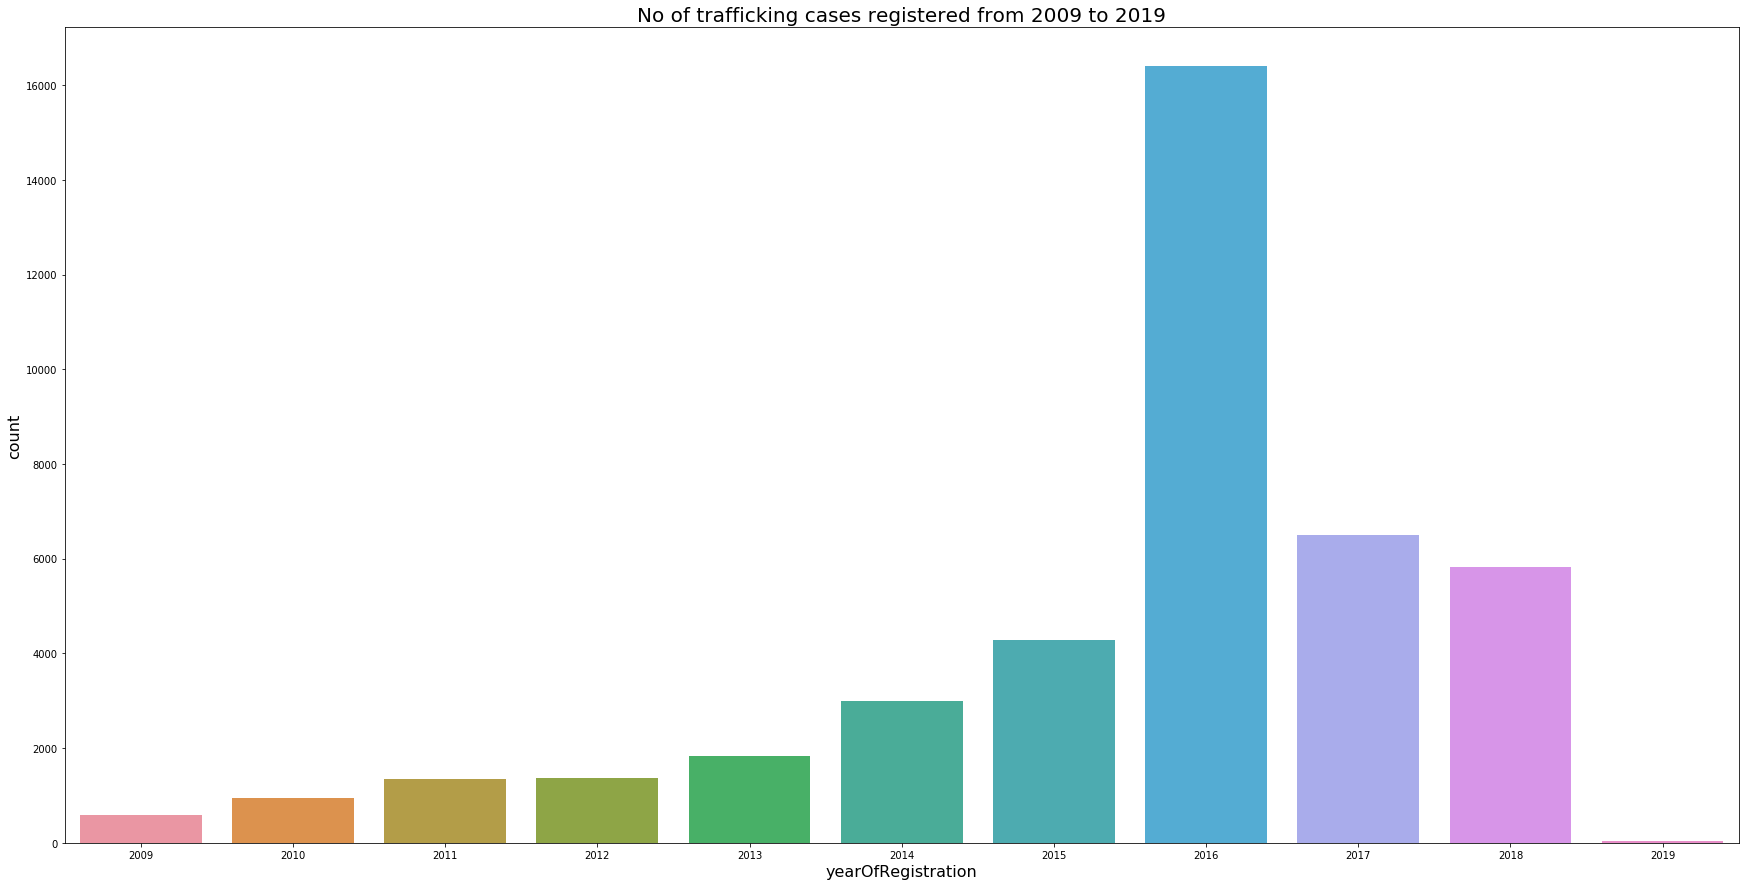

In [616]:
plt.figure(figsize=(30,15))
plt.xlabel('yearOfRegistration',size=16); plt.ylabel('count',size=16); 
sns.countplot(ctdc_9_19[ctdc_9_19['yearOfRegistration']!='unknown']['yearOfRegistration'])
plt.title('No of trafficking cases registered from 2009 to 2019',size=20)

**Observation**:There seem to be 2 trends in the number of cases registered, one from 2009 until 2016 and the other from 2016 until 2019.  
So, it makes sense to analyse data with an increasing trend, finding factors that made the trend behave in the way it does, and likewise for the decreasing trend from 2016 until 2019.

Text(0.5, 1.0, 'Age at the time exploitation(labour/sexual/organ) began.')

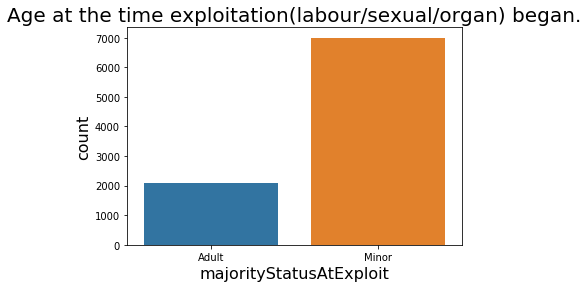

In [644]:
plt.xlabel('count',size=16); plt.ylabel('majorityStatusAtExploit',size=16); 
sns.countplot(ctdc_9_19[ctdc_9_19['majorityStatusAtExploit']!='unknown']['majorityStatusAtExploit'])
plt.title('Age at the time exploitation(labour/sexual/organ) began.',size=20)

Text(0.5, 1.0, 'Age at the time when case was registered')

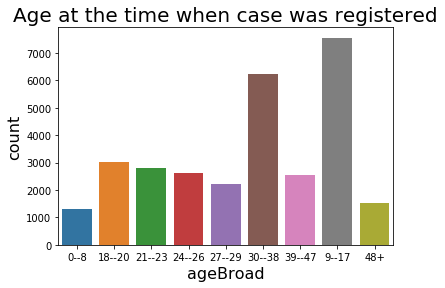

In [647]:
plt.xlabel('count',size=16); plt.ylabel('ageBroad',size=16); 
sns.countplot(ctdc_9_19[ctdc_9_19['ageBroad']!='unknown']['ageBroad'])
plt.title('Age at the time when case was registered',size=20)

In [690]:
ctdc_9_19.replace('unknown',np.nan,inplace=True)
ctdc_9_19.shape

/home/nizam/.local/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


(42098, 63)

In [691]:
data_9_16=ctdc_9_19[ctdc_9_19['yearOfRegistration']<=2016]
data_16_19=ctdc_9_19[ctdc_9_19['yearOfRegistration']>=2016]
data_9_16.shape,data_16_19.shape

((29744, 63), (28753, 63))

### Targets
The following variables shall be treated as **target variable**,one at a time during the analysis  
- isSexAndLabour	
- isForcedLabour  
- isSexualExploit	
- isOtherExploit	
- isForcedMarriage	
- isForcedMilitary	
- isOrganRemoval	
- isSlaveryAndPractices

#### data_9_16  :   from 2009 to 2016(inclusive)  
#### data_16_19:   from 2016 to 2019(inclusive)  

In [705]:
#considering isSexAndLabour as the target.
sex_labour_data = data_9_16.dropna(subset=['isSexAndLabour'])
sex_labour_data.drop(list(set(targets)-set(['isSexAndLabour'])),axis=1,inplace=True)#dropping other targets
sex_labour_data.shape

/home/nizam/.local/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(10171, 56)

In [707]:
sex_labour_data.head()

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
6769,2009,Case Management,Female,18--20,Adult,Adult,Adult,UA,1.0,1.0,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6770,2009,Case Management,Female,18--20,Adult,Adult,Adult,UA,1.0,1.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN
6771,2009,Case Management,Female,18--20,Adult,Adult,Adult,UA,NaN,1.0,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6772,2009,Case Management,Female,18--20,Adult,Adult,Adult,UA,NaN,1.0,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
6773,2009,Case Management,Female,18--20,Adult,Adult,Adult,UA,NaN,1.0,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN


In [11]:
a=pd.read_csv('./Desktop/submission.csv')
b=pd.read_csv('./Desktop/submission_siavrez.csv')
from collections import Counter
Counter(a[800000:900000].open_channels.values)#mera


Counter({0: 91999, 1: 7243, 2: 749, 3: 8, 7: 1})

In [12]:
Counter(b[800000:900000].open_channels.values)#siavrez

Counter({0: 92223, 1: 7043, 2: 726, 3: 8})